![title](images/logos/numba.svg)
<h2 align="center"> Speeding up Numpy Overnight </h2>
<h3 align="center"> Analyzing Taxi Trips: Part 2 </h3>
<h3 align="left"> Anirrudh Krishnan<br>
                  Software Engineer @ Quansight<br> 
                  ChiPy X PyLadies Meetup<br>
</h3>

<h1 align="Center">What is Numba?</h1>

<h1 align="Center">"Numba is an open source JIT compiler that translates a subset of Python and NumPy code into fast machine code."</h1>
<h3 align="Right">- Numba Homepage<h3>

(Let's break that down a little bit more)

<h1 align="Center">A brief introduction to JIT:</h1>
<h1 align="Center">Just In Time Compilers</h1>

<h1 align="center"> In a traditional compiler, <i>all</i> of the source code is scanned, interpreted, compiled, and then run.</h1>



<h1 align="center">A JIT compiler, on the other hand processes the source code at runtime.</h1>

<h1 align="center">When the compiler encouters code that has been marked to be JIT-ted, the source code gets translated to bytecode by the JIT compiler.</h1>

<h2 align="center">The numba JIT compiler is built atop LLVM -- a "compiler infrastructure" (a toolkit) to compile source code to machine code. This essentially means that I can achieve near native performanmce regardless of processor set!</h2>



<h1 align="center">How do I use Numba?</h1>

In [1]:
from numba import jit, njit
class Person:

    def __init__(self, energy):
        self.energy = energy
    
    def drink_coffee(self, cups):
        self.energy = self.add(self.energy, cups)

    @staticmethod
    @njit(["float64(int64, int64)"], cache=True)
    def add(x,y):
        return x + y

Jim = Person(2)
print(Jim.energy)
Jim.drink_coffee(10)
print(Jim.energy)

2
12.0


<h3 align="canter">Sample Problem</h3>
<h3 align="canter">1-Dimensional Schrodinger Equation (Particle In a Box/Infinite Well)</h3>

<h3> This is a classic Introductory Quantum Mechanics Physics Problem! </h3>

<center><img src="https://upload.wikimedia.org/wikipedia/commons/1/13/Infinite_potential_well-en.svg" height="400" width="400"></center>
<center><p><a href="https://upload.wikimedia.org/wikipedia/commons/1/13/Infinite_potential_well-en.svg">Source</a></p><center>

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def psi(n,L,x):
    return np.sqrt(2/L)*np.sin(n*np.pi*x/L)

def eigen_calc(x_values, L):
    for n in range(1,10):
        psi_list = []
        for x in x_values:
            psi_list.append(psi(n,L,x))    
    return psi_list

In [3]:
def plots(x_values, psi_values, psi_sq_values):
    plt.figure(figsize=(20,15))
    plt.suptitle("Wave Functions", fontsize=18)
    for n in range(1,10):
        plt.subplot(6,3,2*n-1)
        plt.plot(x_values, psi_values)
        plt.xlabel("L", fontsize=13)
        plt.ylabel("Ψ", fontsize=13)
        plt.xticks(np.arange(0, 1, step=0.5))
        plt.title("n="+str(n), fontsize=16)
        plt.grid()    
        plt.subplot(6,3,2*n)
        plt.plot(x_values, psi_sq_values)
        plt.xlabel("L", fontsize=13)
        plt.ylabel("Ψ*Ψ", fontsize=13)
        plt.xticks(np.arange(0, 1, step=0.5))
        plt.title("n="+str(n), fontsize=16)
        plt.grid()
        
def simulate():
    h = 6.626e-34 # Planck's Constant
    m = 9.11e-31  # Electron Mass
    x_values = np.linspace(0,1,100000)
    L = 1
    psi_values = eigen_calc(x_values, L)
    psi_sq_values = np.square(psi_values)
    plots(x_values, psi_values, psi_sq_values)

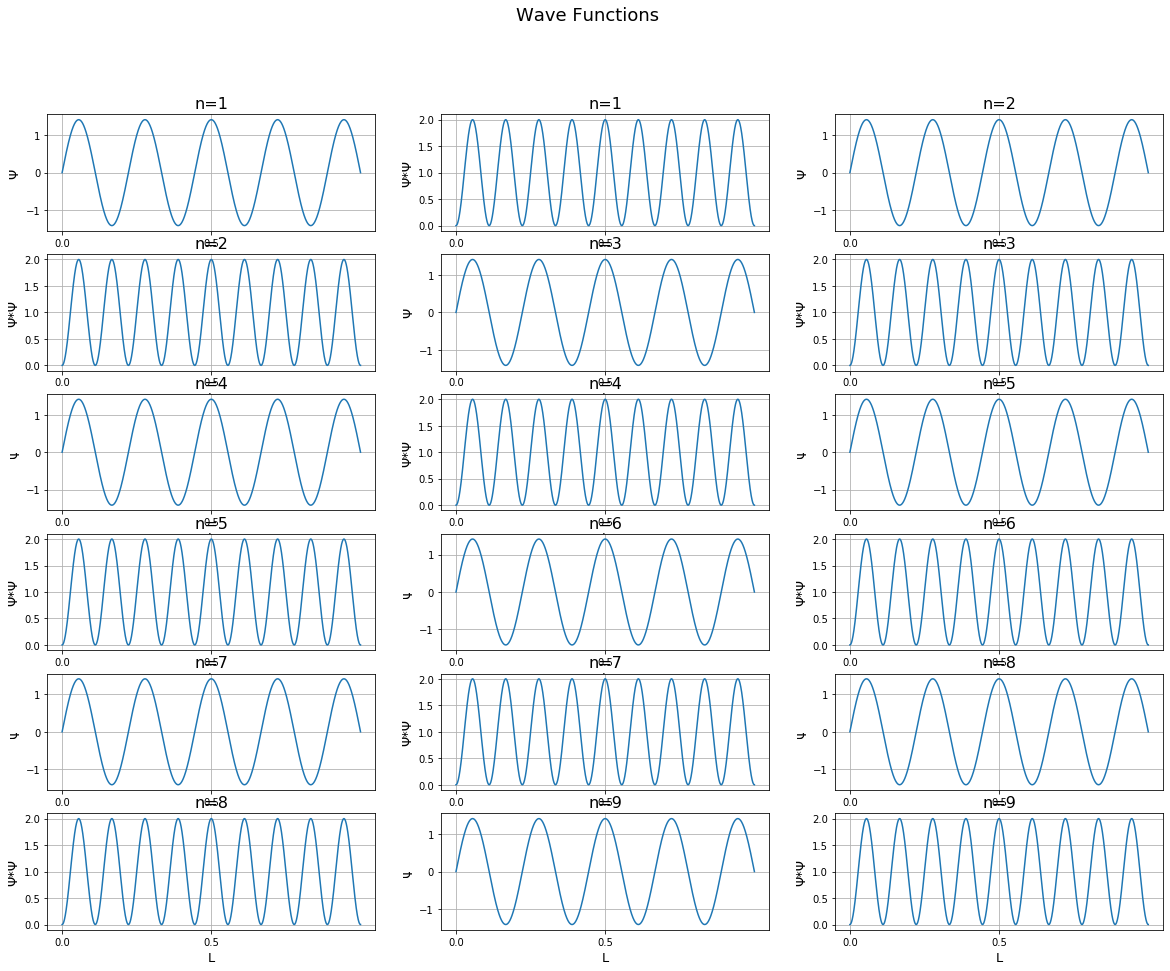

In [4]:
simulate()

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from numba import njit, jit

@njit(nogil=True)
def psi(n,L,x):
    return np.sqrt(2/L)*np.sin(n*np.pi*x/L)

@njit(nogil=True)
def eigen_calc(x_values, L):
    for n in range(1,10):
        psi_value = []
        for x in x_values:
            psi_value.append(psi(n,L,x))
    return psi_value

In [6]:
def plots(x_values, psi_values, psi_sq_values):
    plt.figure(figsize=(20,15))
    plt.suptitle("Wave Functions", fontsize=18)
    for n in range(1,10):
        plt.subplot(6,3,2*n-1)
        plt.plot(x_values, psi_values)
        plt.xlabel("L", fontsize=13)
        plt.ylabel("Ψ", fontsize=13)
        plt.xticks(np.arange(0, 1, step=0.5))
        plt.title("n="+str(n), fontsize=16)
        plt.grid()    
        plt.subplot(6,3,2*n)
        plt.plot(x_values, psi_sq_values)
        plt.xlabel("L", fontsize=13)
        plt.ylabel("Ψ*Ψ", fontsize=13)
        plt.xticks(np.arange(0, 1, step=0.5))
        plt.title("n="+str(n), fontsize=16)
        plt.grid()

def simulate_njit():
    h = 6.626e-34 # Planck's Constant
    m = 9.11e-31  # Electron Mass
    x_values = np.linspace(0,1,100000)
    L = 1
    psi_values = eigen_calc(x_values, L)
    psi_sq_values = np.square(psi_values)
    plots(x_values, psi_values, psi_sq_values)

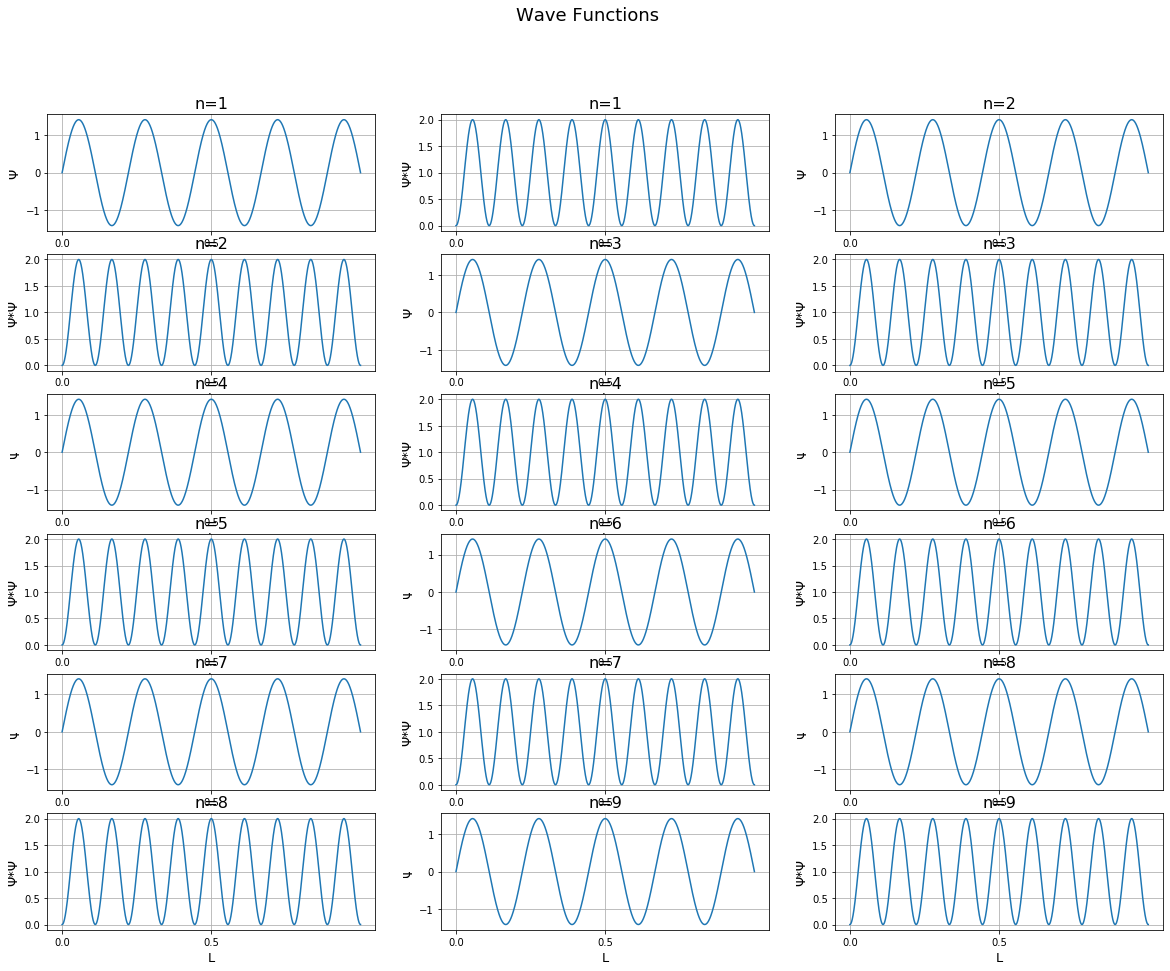

In [7]:
simulate_njit()

<h1> Benchmarks </h1>

<h1>Before Numba<h1>

<center><img src="https://media.giphy.com/media/lM86pZcDxfx5e/giphy.gif"></center>

<h1>After Numba<h1>


<center><img align=center src="https://media.giphy.com/media/b1sVfTKyWWYHm/giphy.gif"/></center>

<h1> Isn't Numba Cool? </h1>
<h3> Numba has many, many other cool things that it can do. </h3>
<h3> Remember, that was a just a small, small example of what <i>can</i> be accomplished by numba. </h3>

<h1> Continuing studies on taxi trips in Chicago...</h1>

In [8]:
from dataformatter import dataFormatter

taxis = dataFormatter("../Data/taxi_trips.parq") # Replace with mega link here
taxis.clean()
taxis.get_year_frame(2015)
taxis.arrays[2015] = taxis.arrays[2015].result()
taxis.write_month(2015)
taxis.create_flag(2015)
taxis.assign_labels(2015, 'indicator')

<h1 align='center'> The Year for Data Was...2015? </h1>





<h3><center><a=href"https://ler.illinois.edu/wp-content/uploads/2015/01/Taxi-Income-Report-Final-Copy1.pdf">Source</a></center></h3>

In [9]:
taxis.arrays[2015]

,trip_total,trip_minutes,month,indicator,labels
trip_start_timestamp,,,,,
2015-01-01 06:00:00,4.75,1.0,1.0,4.750000,2
2015-01-01 06:00:00,16.65,15.0,1.0,1.110000,1
2015-01-01 06:00:00,5.45,5.0,1.0,1.090000,1
2015-01-01 06:00:00,6.45,5.0,1.0,1.290000,2
2015-01-01 06:00:00,39.25,21.0,1.0,1.869048,2
...,...,...,...,...,...
2015-12-31 06:00:00,16.05,15.0,12.0,1.070000,1
2015-12-31 06:00:00,8.65,9.0,12.0,0.961111,1
2015-12-31 06:00:00,40.85,22.0,12.0,1.856818,2


In [10]:
model = taxis.gen_train_test(2015)

Generating train and test...
Dumping Dataset


In [11]:
import knn
simulation = knn.jitknn()
simulation.run_model(model.train, model.test, 80)
simulation.accuracy # LOL

Running Model
Successful Run!


0.5472

<h1><center>Thank you!</center></h1>
<h4><center>Slides + Code + References on Github!</center></h4>
<br>
<h3><center>Twitter: @theanirrudh</center></h3>
<h3><center>Github: @anirrudh</center></h3>